In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

In [33]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

statsmodels:ARMA

http://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html

In [103]:

dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
dta.head()

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0


In [106]:
dta.index[0]

Timestamp('1700-12-31 00:00:00')

In [108]:
stock_diff.index[-1]

Timestamp('2015-11-09 00:00:00')

# 获得股票数据

In [2]:
config = {
        'host': 'localhost',
        'user': 'postgres',
        'password': 'postgres',
        'dbname': 'zhoutao',
        'port': 5432
    }

def read_postgresql(config):
    try:
        conn = psycopg2.connect(**config)
        cur = conn.cursor()
        sql = """select name_stock, datetime_stock,open_price, high_price, low_price, close_price from stock_sz_a where code_stock='000001.SZ' """
        cur.execute(sql)
        stock = cur.fetchall()
        conn.commit()
        cur.close()
        conn.close()
        return stock
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
        
        
stock = read_postgresql(config)

In [3]:
stock_00001 = pd.DataFrame(stock, columns=['name_stock', 'datetime_stock','open_price', 'high_price', 'low_price', 'close_price'])

,name_stock,datetime_stock,open_price,high_price,low_price,close_price
0,平安银行,1993-05-12,1.5274,1.5653,1.5274,1.5597
1,平安银行,1993-05-13,1.5639,1.6031,1.5639,1.5933
2,平安银行,1993-05-14,1.5919,1.6143,1.5863,1.5975
3,平安银行,1993-05-17,1.5975,1.6031,1.5667,1.5667
4,平安银行,1993-05-18,1.5695,1.5835,1.5442,1.5751


In [5]:
stock_00001.index = pd.to_datetime(stock_00001.datetime_stock, format='%Y-%m-%d')
stock_00001.head()

,name_stock,datetime_stock,open_price,high_price,low_price,close_price
datetime_stock,,,,,,
1993-05-12,平安银行,1993-05-12,1.5274,1.5653,1.5274,1.5597
1993-05-13,平安银行,1993-05-13,1.5639,1.6031,1.5639,1.5933
1993-05-14,平安银行,1993-05-14,1.5919,1.6143,1.5863,1.5975
1993-05-17,平安银行,1993-05-17,1.5975,1.6031,1.5667,1.5667
1993-05-18,平安银行,1993-05-18,1.5695,1.5835,1.5442,1.5751


In [12]:
stock_00001 = stock_00001.sort_index()

In [13]:
stock_train = stock_00001.iloc[:6000, ]
stock_test = stock_00001.iloc[6000:,]

In [14]:
stock_test.head()

,name_stock,datetime_stock,open_price,high_price,low_price,close_price
datetime_stock,,,,,,
2015-11-10,平安银行,2015-11-10,12.80,13.07,12.61,12.75
2015-11-11,平安银行,2015-11-11,12.70,12.78,12.38,12.55
2015-11-12,平安银行,2015-11-12,12.60,12.65,12.28,12.40
2015-11-13,平安银行,2015-11-13,12.22,12.48,12.19,12.24
2015-11-16,平安银行,2015-11-16,12.13,12.39,12.09,12.34


In [15]:
stock_train.head()

,name_stock,datetime_stock,open_price,high_price,low_price,close_price
datetime_stock,,,,,,
1991-04-03,平安银行,1991-04-03,0.5698,0.5698,0.5698,0.5698
1991-04-04,平安银行,1991-04-04,0.5670,0.5670,0.5670,0.5670
1991-04-05,平安银行,1991-04-05,0.5642,0.5642,0.5642,0.5642
1991-04-08,平安银行,1991-04-08,0.5586,0.5586,0.5586,0.5586
1991-04-09,平安银行,1991-04-09,0.5559,0.5559,0.5559,0.5559


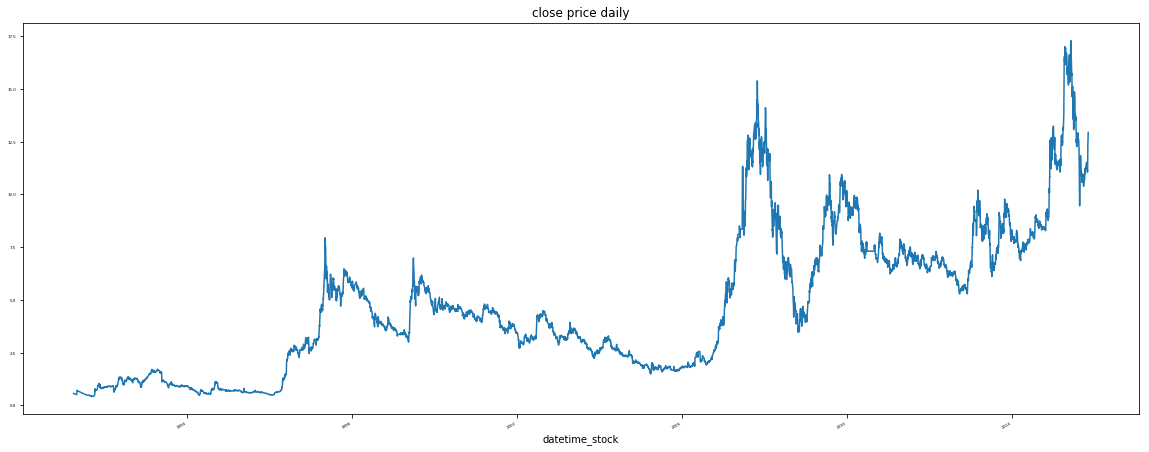

In [16]:
stock_train.close_price.plot(figsize=(20, 8), title='close price daily',fontsize=4)
plt.show()

# 1 时间序列平稳化

In [68]:
stock_rubust = pd.rolling_mean(stock_train['close_price'], window=50)

/home/zt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """Entry point for launching an IPython kernel.


In [79]:
stock_diff = np.diff(stock_train['close_price'],n=1)
stock_diff = pd.Series(np.diff(stock_train['close_price'],n=1), index=stock_train.index[1:])

(5999,)

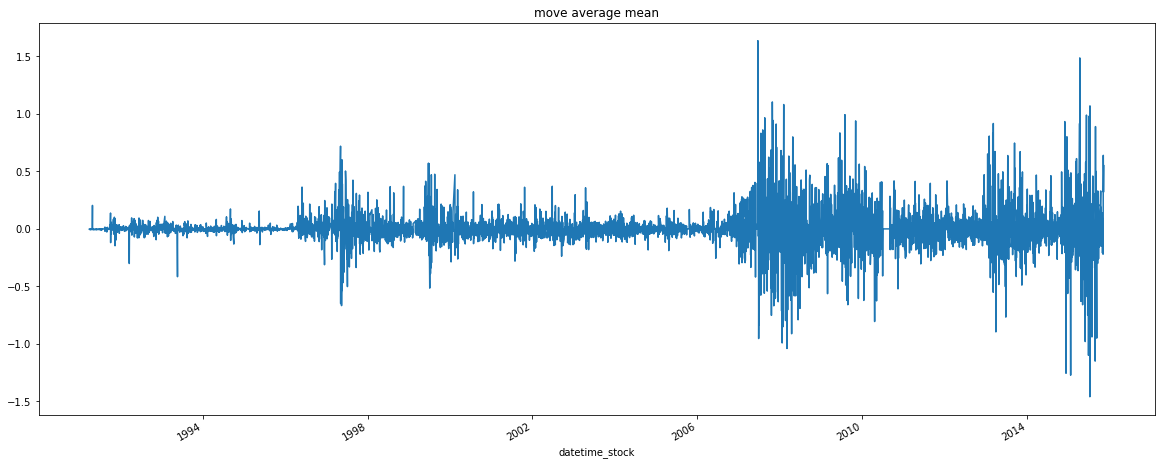

In [81]:
stock_diff.plot(figsize=(20, 8), title='move average mean', fontsize=10)
plt.show()

# 2 自相关和偏相关

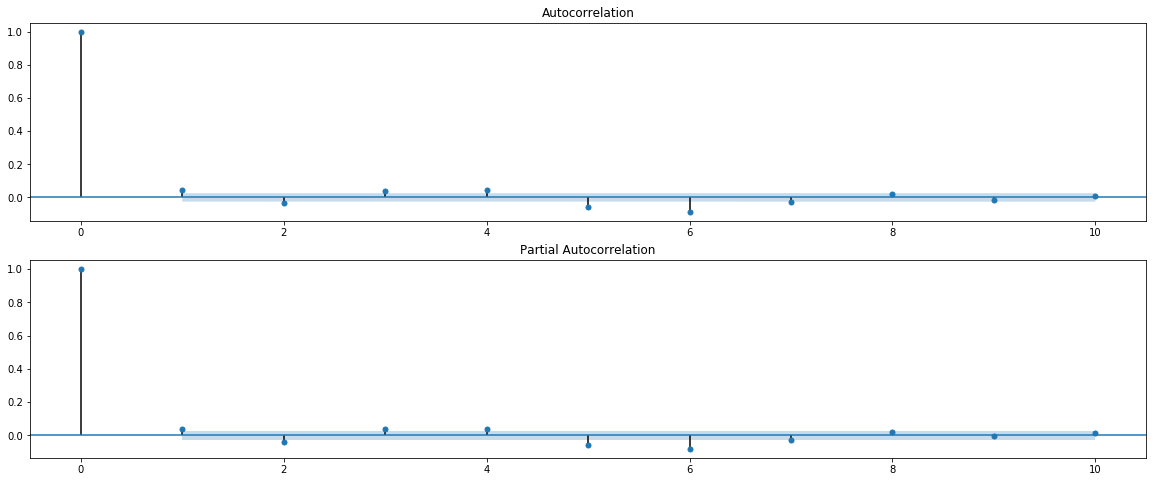

In [86]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_diff, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_diff, lags=10, ax=ax2)

# 3 训练ARMA模型

In [111]:
arma_mod20 = sm.tsa.ARMA(stock_diff, order=(2,2), freq='D').fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

/home/zt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/zt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


const      0.002063
ar.L1.y    0.024122
ar.L2.y   -0.907354
ma.L1.y   -0.031694
ma.L2.y    0.868120
dtype: float64
-4784.387914817067 -4744.191826411148 -4770.428937759864


# 4 杜宾检验

In [112]:
sm.stats.durbin_watson(arma_mod20.resid.values)

/home/zt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1.8940385907967914

In [ ]:
# 5 查看残差的时间序列图的分布情况

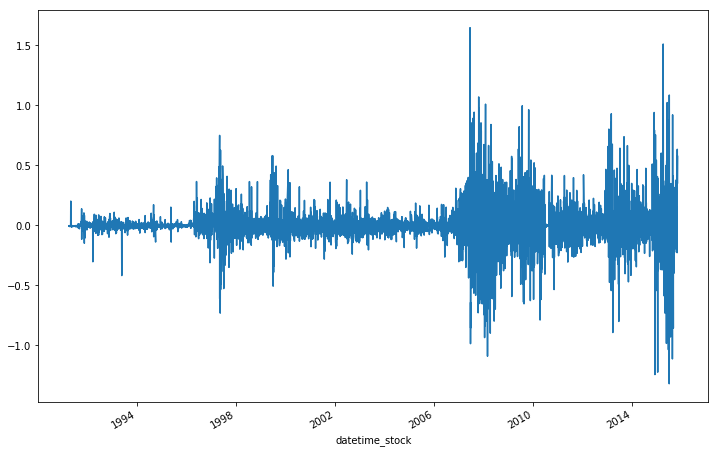

In [113]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax)

In [114]:
arma_mod20.resid.head()

datetime_stock
1991-04-04   -0.004863
1991-04-05   -0.004898
1991-04-08   -0.007930
1991-04-09   -0.005026
1991-04-10   -0.005023
dtype: float64

# 6 查看残差是否呈现正态分布

## 6.1 假设检验查看残差是否符合正态分布

In [90]:
resid = arma_mod20.resid
stats.normaltest(resid) # 检验是否服从正态分布

NormaltestResult(statistic=1426.244815332501, pvalue=1.97184797594635e-310)

## 6.2 残差的qq图是否符合正态分布

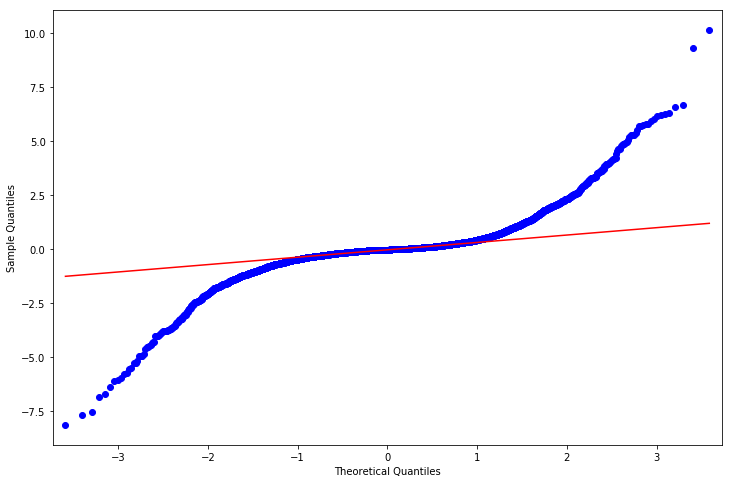

In [91]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## 6.3 查看残差的自相关acf 偏自相关pacf

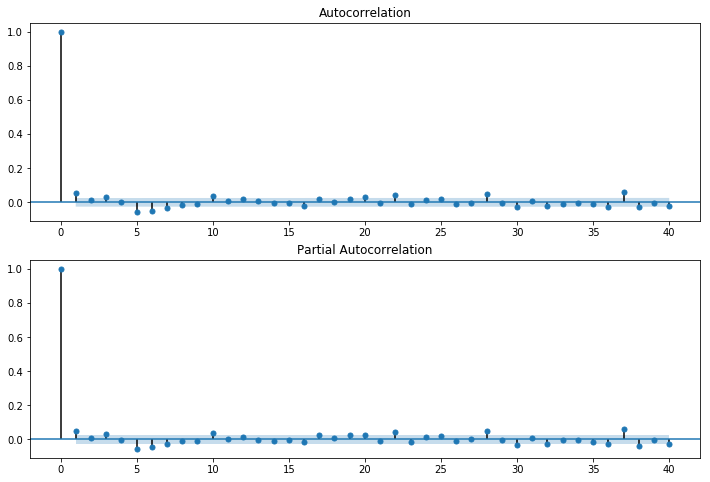

In [92]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

## 6.4 检验各阶的acf

In [93]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.051934   16.188320  5.734661e-05
2.0   0.013298   17.249891  1.795700e-04
3.0   0.034132   24.244580  2.220858e-05
4.0  -0.000474   24.245930  7.130094e-05
5.0  -0.054334   41.976567  5.955071e-08
6.0  -0.049564   56.733127  2.068890e-10
7.0  -0.030544   62.338165  5.143445e-11
8.0  -0.013842   63.489561  9.592461e-11
9.0  -0.011308   64.258045  2.010988e-10
10.0  0.040042   73.895824  7.800761e-12
11.0  0.010101   74.509228  1.683386e-11
12.0  0.018703   76.612589  1.819153e-11
13.0  0.006674   76.880489  4.243472e-11
14.0 -0.003356   76.948242  1.037312e-10
15.0 -0.006424   77.196509  2.265089e-10
16.0 -0.021497   79.977128  1.679878e-10
17.0  0.017266   81.771264  1.855543e-10
18.0  0.004590   81.898078  3.980278e-10
19.0  0.021235   84.612738  2.943163e-10
20.0  0.031664   90.649464  5.706050e-11
21.0 -0.003296   90.714886  1.214538e-10
22.0  0.044995  102.908829  1.993261e-12
23.0 -0.011864  

In [124]:
# 7 预测
构建模型时用的数据的shape是5999,所以预测的start必须从5998开始，end就是预测的结束
因为这里很难把控时间的格式，所以我这里用整数替代start 和end的时间

(5999,)

In [128]:
predict_sunspots = arma_mod20.predict(start=5998, end=6010, dynamic=True)
print(predict_sunspots)

2015-11-09   -0.024867
2015-11-10    0.015848
2015-11-11    0.026831
2015-11-12   -0.009847
2015-11-13   -0.020697
2015-11-14    0.012321
2015-11-15    0.022963
2015-11-16   -0.006740
2015-11-17   -0.017112
2015-11-18    0.009588
2015-11-19    0.019644
2015-11-20   -0.004341
2015-11-21   -0.014043
Freq: D, dtype: float64


/home/zt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


/home/zt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


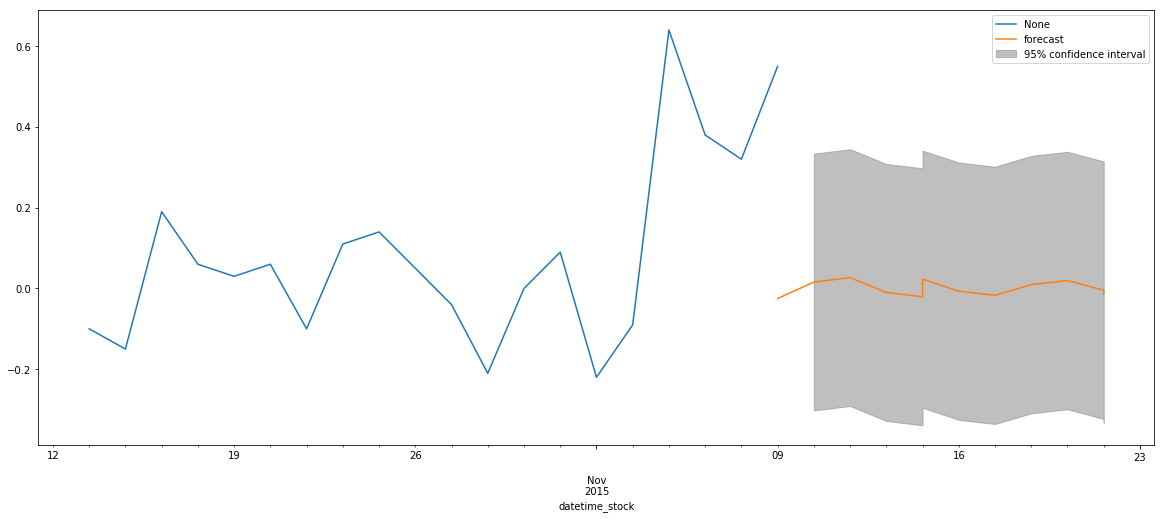

In [126]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = stock_diff[-20:].plot(ax=ax)
fig = arma_mod20.plot_predict(5998, 6010, dynamic=True, ax=ax, plot_insample=False)